In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm 
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score


(150, 4)


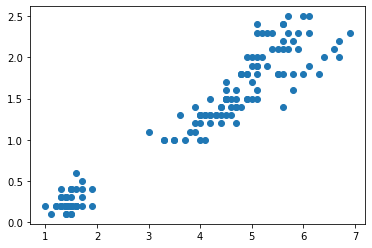

In [5]:
#load iris dataset
data = datasets.load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
print(df.shape)
df.head()
x = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 'columns')
x.head()
plt.scatter(x['petal length (cm)'], x['petal width (cm)'])

For n_clusters =  2 the average silhouette_score is : 0.7653904101258123
For n_clusters =  3 the average silhouette_score is : 0.6604800083974887
For n_clusters =  4 the average silhouette_score is : 0.6128714659599253
For n_clusters =  5 the average silhouette_score is : 0.5883732712110276


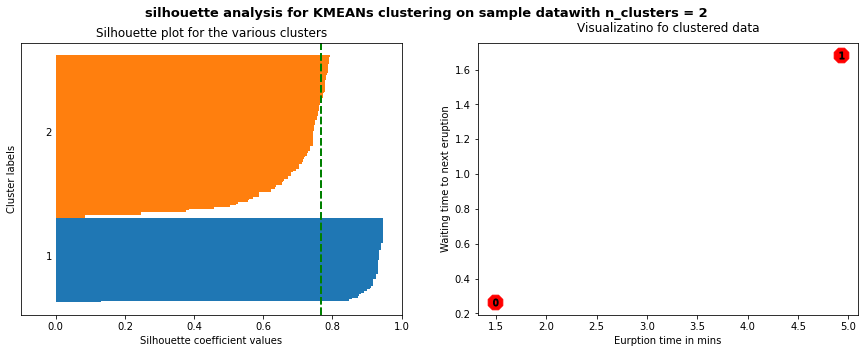

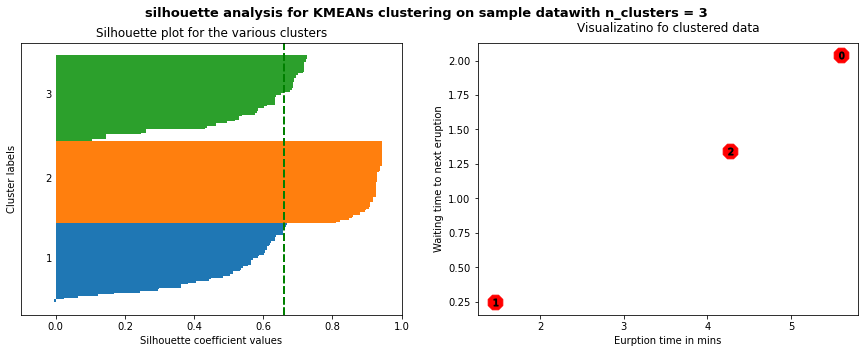

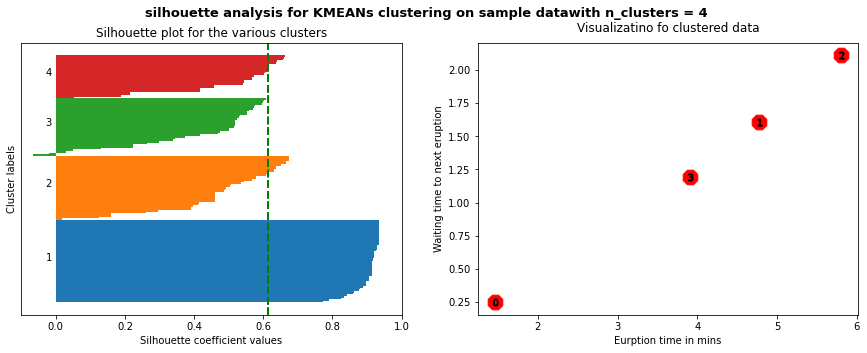

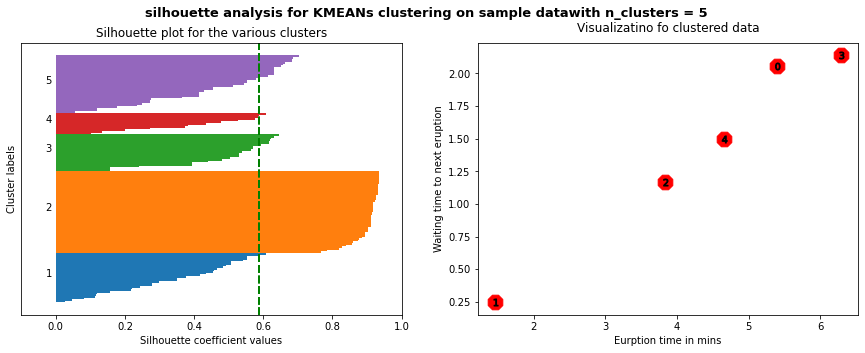

In [14]:
for i,k in enumerate([2,3,4,5]):
    fig, ax = plt.subplots(1,2,figsize = (15,5))
    
    #Run the kmenas algorithm
    km = KMeans(n_clusters = k)
    y_predict = km.fit_predict(x)
    centroids = km.cluster_centers_
    
    silhouette_vals = silhouette_samples(x,y_predict)
    #calculate silhouette score
    score = silhouette_score(x, km.labels_, metric = 'euclidean')
    #print the score
    print("For n_clusters = ", k,
         "the average silhouette_score is :", score)
    
    y_ticks = []
    y_lower = y_upper = 0
    
    for i, cluster in enumerate(np.unique(y_predict)):
        cluster_silhouette_vals = silhouette_vals[y_predict == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)

        ax[0].barh(range(y_lower,y_upper),
                  cluster_silhouette_vals,height = 1);
        ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
        y_lower +=len(cluster_silhouette_vals)

        # get the average silhouette score
        avg_score = np.mean(silhouette_vals)
        ax[0].axvline(avg_score,linestyle = '--', linewidth = 2, color = 'green')
        ax[0].set_yticks([])
        ax[0].set_xlim([-0.1,1])
        ax[0].set_xlabel('Silhouette coefficient values')
        ax[0].set_ylabel('Cluster labels')
        ax[0].set_title('Silhouette plot for the various clusters');
    ax[1].scatter(centroids[:,0],centroids[:,1],marker = '8', c = 'r', s = 250, label = 'Centroids');
    for i,c in enumerate(centroids):
        ax[1].scatter(c[0],c[1],marker = '$%d$' % i, alpha = 1, s = 50, edgecolor = 'k')

    ax[1].set_xlabel('Eurption time in mins')
    ax[1].set_ylabel('Waiting time to next eruption')
    ax[1].set_title('Visualizatino fo clustered data', y = 1.02)
    plt.suptitle(("silhouette analysis for KMEANs clustering on sample data" "with n_clusters = %d" %k),
                     fontsize = 13, fontweight = 'semibold')
plt.show()